# MLP

In [51]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from model.architectures import MLP,SkipMLP

## Create Data

In [52]:
f = lambda x: 1+2*x**2

N = 32
xs = (4*torch.rand(N)-2)[:,None]
ys = f(xs) + 0.01*torch.randn(N,1)
x = torch.linspace(-2,2,100)

dataset = TensorDataset(xs, ys)
data_loader = DataLoader(dataset, batch_size=N, shuffle=True)

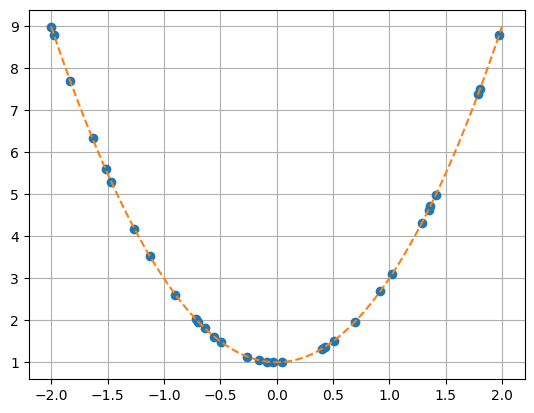

In [53]:
plt.plot(xs[:,0].detach().numpy(), ys[:,0].detach().numpy(), 'o',label='data')
plt.plot(x.detach().numpy(), f(x).detach().numpy(), '--',label='true')
plt.grid()
plt.show()

In [54]:
model = SkipMLP(input_dim=1, hidden_dims=[64,64,64], output_dim=1)
loss_fn = nn.MSELoss()  
opt = torch.optim.SGD(model.parameters(), lr=0.001)

model.train()
losses = []
for epoch in range(1000):
    for xs, ys in data_loader:
        preds = model(xs)
        loss  = loss_fn(preds, ys)
        loss.backward()
        opt.step()
        opt.zero_grad()  

        losses.append(loss.item())
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 24.965652465820312
Epoch 10, Loss: 6.685110569000244
Epoch 20, Loss: 5.037165641784668
Epoch 30, Loss: 3.8372764587402344
Epoch 40, Loss: 2.936840534210205
Epoch 50, Loss: 2.2673377990722656
Epoch 60, Loss: 1.786674976348877
Epoch 70, Loss: 1.4489666223526
Epoch 80, Loss: 1.2110886573791504
Epoch 90, Loss: 1.0421435832977295
Epoch 100, Loss: 0.9218174815177917
Epoch 110, Loss: 0.8260202407836914
Epoch 120, Loss: 0.7460482120513916
Epoch 130, Loss: 0.6769657731056213
Epoch 140, Loss: 0.6171337366104126
Epoch 150, Loss: 0.5641756653785706
Epoch 160, Loss: 0.5155943632125854
Epoch 170, Loss: 0.47286200523376465
Epoch 180, Loss: 0.4339955151081085
Epoch 190, Loss: 0.3990669250488281
Epoch 200, Loss: 0.3678380250930786
Epoch 210, Loss: 0.33982783555984497
Epoch 220, Loss: 0.31438401341438293
Epoch 230, Loss: 0.29160812497138977
Epoch 240, Loss: 0.2712380290031433
Epoch 250, Loss: 0.2526550889015198
Epoch 260, Loss: 0.23551498353481293
Epoch 270, Loss: 0.21987172961235046
Epoc

## Evaluate

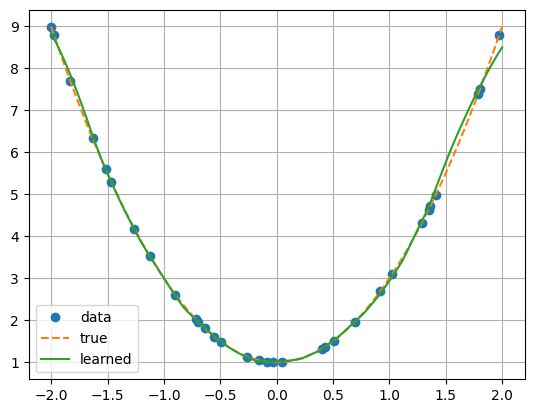

In [55]:
plt.plot(xs[:,0].detach().numpy(), ys[:,0].detach().numpy(), 'o',label='data')
plt.plot(x,f(x), '--',label='true')
plt.plot(x,model(x[:,None]).squeeze().detach().numpy(), '-',label='learned')
plt.legend()
plt.grid()
plt.show()